# Adsorption Models for Open Metal Sites

In [ ]:
import utility_functions_new as uf
import adsorption_models as adsm
import numpy as np

These are the adsorption energies $\Delta H_{ads}$, ordered from 1st H$_2$ to last H$_2$, in the case of Ca-catecholate: [Reference](https://doi.org/10.1002/cphc.201601215)

In [2]:
ca_cat = np.array([-16.0, -15.7, -15.3, -15.0], dtype=np.float)

### evalutation of internal energy

To evaluate the internal energy that is produced in the adsorption process, where translational and rotational degrees of freedom are converted to vibrations (with high internal energy) we assume the following:

1. One translation is converted to vibration. The typical frequency of the new virtation is $\nu = 300 cm^{-1}$.
2. One rotation is converted to vibration. The typical frequency of the new virtation is $\nu = 800 cm^{-1}$.

These numbers are approximate and were found to be typical for H$_2$ adsorption in previous work. The lower frequency corresponds rotation -> vibration transformation and the higher frequency corresponds to translation -> vibration transformation. 

The absolute minimal reqirement for a molecule to be adsorbed, is one tranlation -> vibration convertion. The translational degree of freedom which is lost is perpendicular to the surface and since it is lost, the molecule does not escape in the "up" direction into space and remains adsorbed. The vibration is perpendicular to the surface and has a frequency roughtly in the order of 700-800 cm$^{-1}$ in proportion to the "strength" of adsorption. 

### example
We now calculate the internal energy of these new vibrations:

In [3]:
vibrations = np.array([300, 800], dtype=np.float)
temperature = np.float(298.15) 

E_vib = uf.vib_energy(vibrations, temperature)
print('The internal energy is {:0.2f} kJ/mol at 298.15 K'.format(E_vib.sum()))

The internal energy is 7.88 kJ/mol at 298.15 K


$\Delta E_{vib} = 7.88$ KJ mol$^{-1}$

About zero point energy: note, that often people often ask about the "zero point energy" which is the vibrational energy at zero Kelvins. However, at non-zero temperature we should be interested in much more than the zero'th level. These higher level of vibrational excitation were taken into account.

About contribution to energy: The vibrations that form during the adsorption reaction increase the internal energy of the system - and increase the enthaply of adsorption (it becomes less negative) and therefore formation of vibrational energies is a force which impedes adsorption.

### Evaluation of enthalpy

For each molecule which is adsorbed, the $p\cdot V$ term in the definition of the enthalpy quals to $R\cdot T$: 

$H = E + p \cdot V = E + R \cdot T$

Assuming ideal gas behaviour, which is resonable for H$_2$ and if you do the very simple math: 

$H_{ads} = H_{complex}@H_2 - H_{complex}  - H_{H_2} = \Delta E_{ads} - R\cdot T$ + $\Delta E_{vib}$

You could come to the conclusion that we need to subtract $R\cdot T$ for each adsorbed $H_2$.

In [4]:
print('RT = {:0.1f} at 298.15 K'.format(uf.R * 298.15))

RT = 2.5 at 298.15 K


### Evaluation of entropy
In this work, we simply assume that the enthalpy is constant, in the order of $S=8.5/R$ kJ mol$^{-1}$ K$^{-1}$. This is justified as we do not attempt to predict actual capacities, rather, to qualitativly predict the the behaviour of the system. We have previoulsy predicted the adsoption entropy based on entopy~enthalpy empirical relation from previous work.

### Free energy of adsorption

The definition of the Gibbs free energy is:

$G = H - TS$

And the free energy of adsorption is defined as:

$\Delta G_{ads} = G_{complex@H_2} - G_{complex} - G_{H_2} = $

$\Delta H_{ads} + T\cdot S = \Delta E_{ads} + \Delta E_{vib} + T\cdot S - R\cdot T$ 

## Adsorption Models (or site-occupancy)

### Parallel model
In this study if all H$_2$ molecules are adsorbed with the same \Delta E_{ads}, it is assume that adsorption is parallel, or in other words, that all H$_2$ molecules are adsrobed simulteniously:

M-NTA + $\textit{n}$H$_2 \rightarrow$ M-NTA@$\textit{n}$H$_2$
### Sequential model
However, if there is a decline in $\Delta E_{ads}$ for subsequent molecules, the process is assumed to be sequential:

M-NTA@$\textit{n}$H$_2$ + H$_2 \rightarrow$ M-NTA@$(\textit{n+1})$H$_2$

Please note, that the the results obtained by these wo models may be very similar.
### More complex models
For CH$_4$ adsorption in MOF-5 we have developed a more complicated model, where the first molecules is adsorbed dequentially and followed by three parallel molecules and more.[Reference](https://doi.org/10.1021/acs.jpcc.7b04246).

## The adsorption polynomial
The adsorption polynomial ($Q$) is how our theory of adsorption is methematically represented. Please look at "Molecular Driving Forces" by Dill Ch. 28 "Multi-site Cooperative Ligand Binding" to understand it better. The Extended Langmuir Model (ELM) for multi-site of the occupancy of the total occupancy of the sites is derived from the adsorption polynomial using this expression:

$$occ = p \cdot \frac{d Q}{d p}$$

You can generate an EML for the occupancy in a sequential adsorption of `n` molecules using this command:

In [5]:
adsm.gen_ext_langmuir(3)

p*(3*K1*K2*K3*p**2 + 2*K1*K2*p + K1)/(K1*K2*K3*p**3 + K1*K2*p**2 + K1*p + 1)

For a single molecule this is simply the standrad Langmuir equation:

In [6]:
adsm.gen_ext_langmuir(1)

K1*p/(K1*p + 1)

A note about implementation: Derivation of the EML is carried using the `sympy` symbolic algebra for python package. This makes the whole process of derivation and assignement in the expression quite slow. However, since the system is also small - it does not make a big difference. 

## Getting the actual adsorption isotherm
We'll look at Sc-NTA metal site. It adsorbes up to three molecules with the following energies:

In [7]:
adsorption_energies = [-20.5, -16.0, -14.6]

Since the adsorption energies decrese, we assume a sequantial adsorption model. We can also adjust the temperature at each given pressure: At lower pressures, the temperature should be higher to release strongly adsorbed molecules. At High pressure the temperature should be as lower as possible to fill the site as much as possible.

The minumal temperature that we'll consider is -50 Celcius, which is determined by our experimental collaborators, and we'll set the maxiumum temperature to 50 Celcius (arbitrarily).

In [8]:
temperature_range = [298.15 + 50, 298.15 - 50]

The vibrations are 300 and 800 as discussed above:

In [9]:
vibrations = [300, 800]

Now, lets generate the object

In [10]:
model1 = adsm.ExtendedLangmuir(name='NTA-Sc',
                               e_ads=adsorption_energies,
                               vibs=vibrations,
                               temp_limits=temperature_range)

Obtain the isotherm, assuming a sequential model:

In [11]:
isotherm_var = model1.sequential_isotherm()

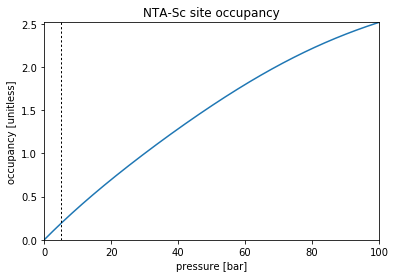

In [12]:
uf.plot_occupancy(isotherm_var, title="NTA-Sc site occupancy")

If we would have chosen a constant temperature, the adsorption isotherm will have a more "conventional" look:

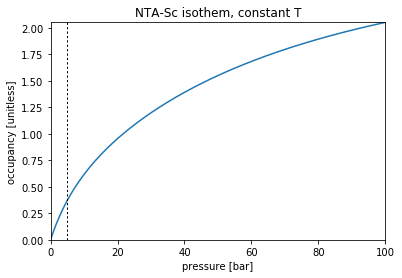

In [13]:
temperature_range = [298.15, 298.15]

model2 = adsm.ExtendedLangmuir(name='NTA-Sc',
                               e_ads=adsorption_energies,
                               vibs=vibrations,
                               temp_limits=temperature_range)

isotherm_const = model2.sequential_isotherm()

uf.plot_occupancy(isotherm_const, title='NTA-Sc isothem, constant T')

And we can compare this result to parallel adsorption:

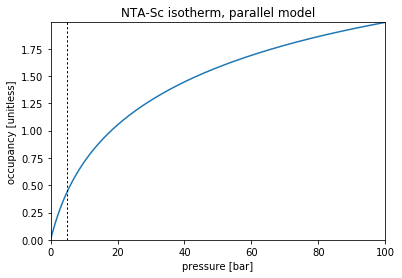

In [14]:
isotherm_const = model2.parallel_iso()

uf.plot_occupancy(isotherm_const, "NTA-Sc isotherm, parallel model")

We can see that there is only a ver small difference between parallel and sequantial models. However, its always important with the correct physical model - otherwise, your results are not "physical".

## Usable occupancy


You can use the utility function (uf) to calculate the point occupancy of the OMS at a given pressure, let say 15 bar: 

In [19]:
uf.point_occupancy(isotherm_const, pressure=15)

0.90324987364830944

Or the usable occupancy at minimal pressure of 5 bar (default) and maximum pressure of 65 bar:

In [20]:
uf.usable_occupancy(isotherm=isotherm_const, p_min=5, p_max=65)

1.2953618677486736